<a href="https://colab.research.google.com/github/Ayush4404/Disease-prediction/blob/main/disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [ **DAY 1**](https://)

authentication of kaggle into your system

In [22]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ayushrawat4404","key":"9315e42f33687b7af9ea2aa49a9ebf4f"}'}

some configuration of the permision

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [24]:
!pip install kaggle

In [25]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 42.6MB/s]


In [26]:
import pandas as pd
df =pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

whole dataset has thousands of rows and we cant read it all to check so we use df.head what is in the dataser and give first five rows to see the dataset

In [27]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


to check the attributes we use df.columns

In [28]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


we dont know about the empty values so we check the no of empty spaces in each columns by

In [29]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Fill the empty values and to move forwards numeric col and string type col and numeric col helps us find all these values and store the mean in the numeric col in the whole datasets , why only numeric value?because we can use this no as data when training the model and the second line is for filling the empty spaces with the mean of the each column . but why not fill the string values ?
Because we cant take mean of the text duh !!

In [30]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.000000,233.0,150.000000,2.300000,0.000000,0
1,2,67,160.000000,286.0,108.000000,1.500000,3.000000,2
2,3,67,120.000000,229.0,129.000000,2.600000,2.000000,1
3,4,37,130.000000,250.0,187.000000,3.500000,0.000000,0
4,5,41,130.000000,204.0,172.000000,1.400000,0.000000,0
...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,0.676375,1
916,917,62,132.132404,139.0,137.545665,0.878788,0.676375,0
917,918,55,122.000000,223.0,100.000000,0.000000,0.676375,2
918,919,58,132.132404,385.0,137.545665,0.878788,0.676375,0


both are used for visualization where plt is like simple brush but sns is like fancy paint like oil paint and more stylish and beautiful so like a advance version of the matplotlib and heatmaps and all is done by sns

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize to define the size and tight to show all in one place , if we go in datascience we can use this type to create the visualization , here we can see the simple graphs as we are using matplot lib

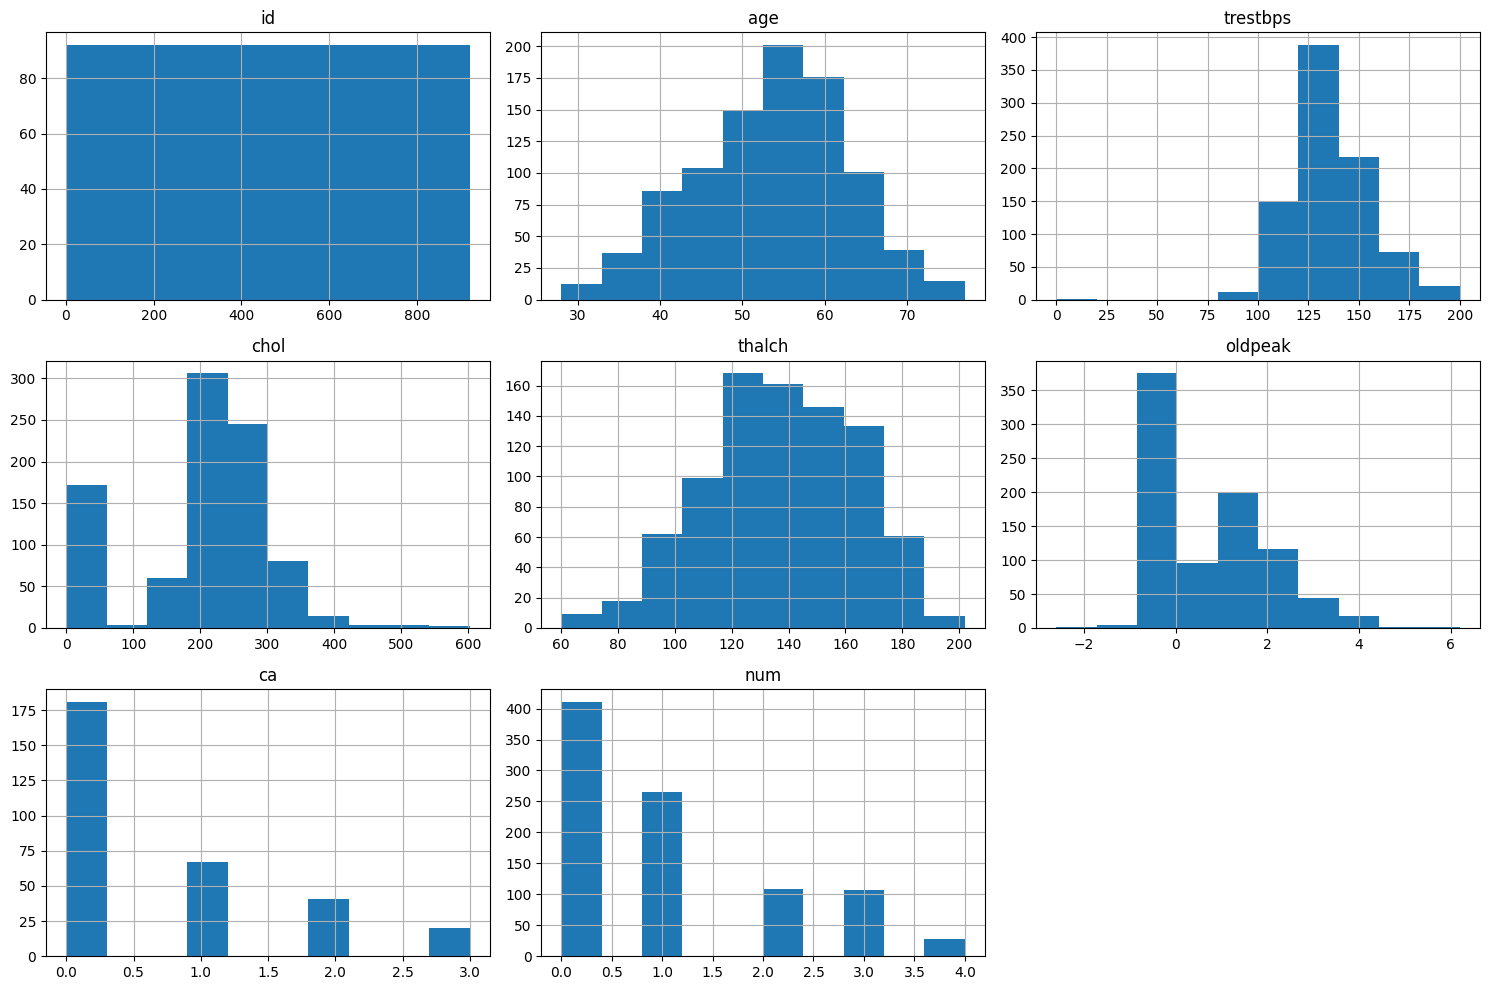

In [32]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

heatmap show how strong the correlation is , this comes under sns and we have correlation bar to show which have the highest to the lowest. we also use the negitive to show what is not for the correlation but we are still considering it.

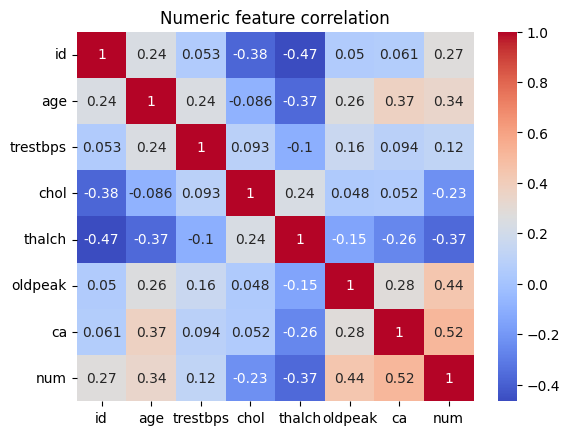

In [33]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('Numeric feature correlation')
plt.show()

# **Day 2**

model training

here we are categorizing we are removing the number convert students ans to number but not change the final grades as it affects the other , text based data to number so machine understand the language of  01 so we remove the numeric value

In [34]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

new df that have all the col except the target col so either he is suffering or he is not

In [35]:
X=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

convert the catagorial into num values using 1 0 to understand by machine its a module which convert all categorial into numeric forms

In [42]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

# Fill missing values in categorical columns with the mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)

X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


/tmp/ipython-input-1599024012.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


#  Day 3 advanced models and data featuring

here we are spliting the data into train test and other is used to standardrized as if one kid get 8 hrs guidence but other kid get 2hr so to standarized the data we use standard scaler

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

these are the features which we use to train and test test size out of whole 1 we take 0.2 test and random state is used to get different part of data to train as we then goes on on on on the same data



In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


here are we are resizing the data to same scale new value is = x (mean) /sd here in 2nd line its learning from the data and in 3 its using that data to scale the data test we have to scale the test data also using but we not fit as we cant let the student know what will come in exam

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

here we are using logistic regression from maths its not about regression but more of the classification

In [40]:
from sklearn.linear_model import LogisticRegression

here its like giving admission to a new student and 2nd is like the main trainning step here we feed the xtrainscaled next is ytrain is like teacher which tell whether its right or wrong

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Handle missing values (replace NaN with column mean)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # increase iterations if convergence warning
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Model evaluation

precision and f1 score and so on for the accuracy

In [46]:
from sklearn.metrics import accuracy_score,classification_report

first line is about we take the trained data and compare them



In [47]:
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report (y_test,y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



score from 75-98 is good but 100 is like model got spoiled from overfitting
0 1 is pricision how often time its correct and 1 88 times model was right and we have avg now for the recall we are taking the real data how many does model catched it and the f1 score is balances of both precision and accuracy overfitting is like we give more data then requuired its called overfitting whereas under fitting is like giving less data then the required data

# Day 4 Random forest, and feature importance

here we are having high 2 positive we focus on , model is performing well 16 time false + and 13

In [49]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

advanced the model with random forest make forest of multiple trees and take mean of each branches we take no of divistion

In [50]:
from sklearn.ensemble import RandomForestClassifier

its like no of trees seter estimators and random state as 42

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.875


feature importance

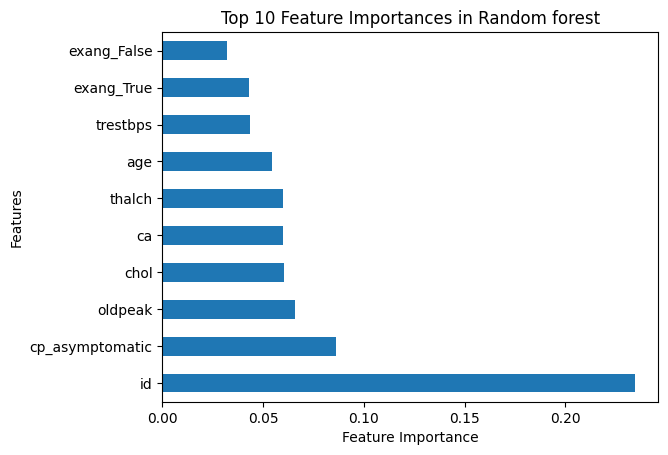

In [52]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

save the model into our environment retraining again and again when we have high amount of data h5 but here we  can store data in the structured ways with pkl loading the pickle file into the system with joblib

In [53]:
import joblib
joblib.dump(rf_model,'rf_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [54]:
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

blank temp do create own

In [55]:
sample = X.head(1)
sample.to_csv('Heart_user_temp.csv',index=False)
print("User Template saved  successfully")

User Template saved  successfully


# **Day 5 - user upload and prediction**

In [56]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical_angina,cp_non-anginal,cp_typical_angina,fbs,restecg_normal,restecg_st,restecg_lv_hypertrophy,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,ups_loping,down_loping,reversible\n55,120,200,0,140,0,1.2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0\n62,130,220,1,150,1,2.0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1\n45,115,180,0,160,0,0.8,0,0,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0\n58,135,250,2,145,1,1.5,2,2,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0\n50,125,190,0,170,0,0.5,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1\n67,140,230,1,130,1,2.2,1,1,2,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1\n43,110,170,0,180,0,0.9,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0\n60,145,260,2,140,1,1.8,2,3,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0\n52,120,210,0,155,0,1.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0\n48,130,200,1,165,0,1.3,1,

In [66]:
import joblib
import pandas as pd
user_df = pd.read_csv('heart_dataset.csv')
#getting columns list from training dataframe
numeric_cols = user_df.select_dtypes(include=['number']).columns.tolist()
cat_cols = user_df.select_dtypes(include='object').columns.tolist()
bool_cols = user_df.select_dtypes(include='bool').columns.tolist()

#dropping columns which are extra in user_def than required to avoid error
numeric_cols =[col for col in numeric_cols if col not in user_df.columns]
cat_cols =[col for col in cat_cols if col not in user_df.columns]
bool_cols =[col for col in bool_cols if col not in user_df.columns]

#fill the missing columns and cat col
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
    user_df[col] = user_df[col].fillna('unknown')

for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

#one-hot encoding cat col
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

#align the columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

#scale data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#prediction
model = joblib.load('rf_model.pkl')
user_pred = model.predict(user_df_scaled)
user_df['Heart Disease'] = user_pred
#result
print(user_df)

   age  trestbps  chol  restecg  thalch  exang  oldpeak  slope  ca  thal  ...  \
0   55       120   200        0     140      0      1.2      0   0     0  ...   
1   62       130   220        1     150      1      2.0      1   1     1  ...   
2   45       115   180        0     160      0      0.8      0   0     2  ...   
3   58       135   250        2     145      1      1.5      2   2     1  ...   
4   50       125   190        0     170      0      0.5      0   0     0  ...   
5   67       140   230        1     130      1      2.2      1   1     2  ...   
6   43       110   170        0     180      0      0.9      0   0     1  ...   
7   60       145   260        2     140      1      1.8      2   3     2  ...   
8   52       120   210        0     155      0      1.0      0   0     0  ...   
9   48       130   200        1     165      0      1.3      1   1     1  ...   

   n4  n5  n6  n7  n8  n9  ups_loping  down_loping  reversible  Heart Disease  
0   0   0   0   0   0   0   